<h1> REGRESIÓN LOGISTICA: DATASET TITANIC </h1>

Daniel Andres Rachen Chaparro

---
<h3> 1. Análisis exploratorio de los datos </h3>

In [3]:
# Importación de librerias y funciones:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
# Importación y previsualización de datos:
data = pd.read_csv('./Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Numero de registros y de atributos:
data.shape

(891, 12)

In [6]:
# Estadisticas basicas X atributo:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---
<h3> 2. Preprocesamiento de los datos </h3>

In [8]:
# Reconocimiento de valores nulos:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Eliminación de atributos:
#  - PassengerId: Se elimina porque no aporta nada al caso.
#  - Cabin: Se elimina porque tiene demasiados valores nulos, por ende, su aporte es muy pobre, nulo o contraproducente.
data = data.drop(columns=['Cabin', 'PassengerId'])


In [10]:
# Eliminación de valores nulos en el dataset:
data = data.dropna()

In [11]:
# Verificación de eliminación de valores nulos:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [12]:
# Numero de registros y de atributos tras la eliminación de valores nulos:
data.shape

(712, 10)

In [13]:
#Tipos de datos X atributo:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [14]:
# Conversion del atributo "Sex" a tipo numerico:
mapeo = {'female': 1, 'male': 2}
data['Sex'] = data['Sex'].map(mapeo)

---
<h3> 3. Selección de características más relevantes para entrenar el modelo </h3>

In [16]:
# Numero de sobrevivientes y fallecidos (0=fallecido; 1=sobreviviente): 
conteo_valores = data['Survived'].value_counts()
print(conteo_valores)

Survived
0    424
1    288
Name: count, dtype: int64


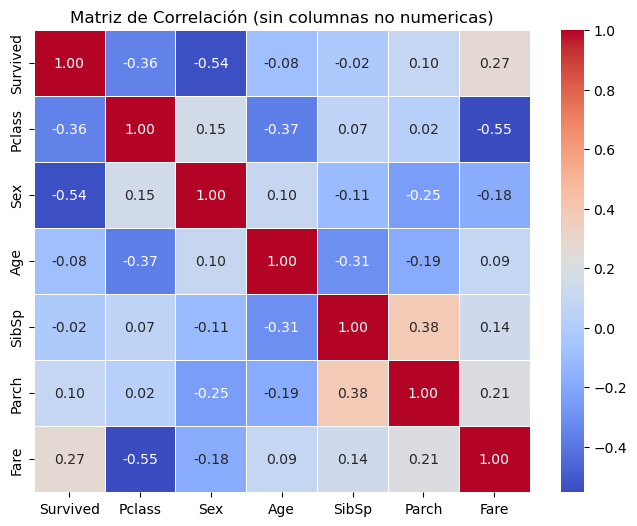

In [17]:
# Matriz de correlación de atributos no numericos
df = pd.DataFrame(data)
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación (sin columnas no numericas)')
plt.show()


<H5> CARACTERISTICAS SELECCIONADAS: </H5>
<h6> Tras estudiar el caso, se han descartado las siguientes caracteristicas debido a que se considera que no aportan nada en la construcción del modelo:</h6>
<h6> - Name. </h6>
<h6> - Ticket. </h6>
<h6> - Embarked. </h6>

In [19]:
# Descarte de caracteristicas no deseadas:
data = data.drop(columns=['Name', 'Ticket', 'Embarked'])

---
<h3> 4. Dividir el dataset en Train y Test </h3>

In [21]:
# Division de los datos de entrenamiento y de prueba:
Y = data['Survived']
X = data.drop(columns=['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.3, stratify=Y, random_state=0)

---
<h3> 5. Entrenamiento del modelo </h3>

In [23]:
# Construcción del modelo con los datos Train y Test:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, y_train)

prediccion = modelo_regresion.predict(X_test)

---
<h3> 6. Evaluación del desempeño del modelo entrenado </h3>

In [25]:
# Impresión de las metricas de efectividad del modelo entrenado:
print (classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       127
           1       0.88      0.68      0.77        87

    accuracy                           0.83       214
   macro avg       0.85      0.81      0.82       214
weighted avg       0.84      0.83      0.83       214



---
<h3> 7. Grafica de resultados </h3>

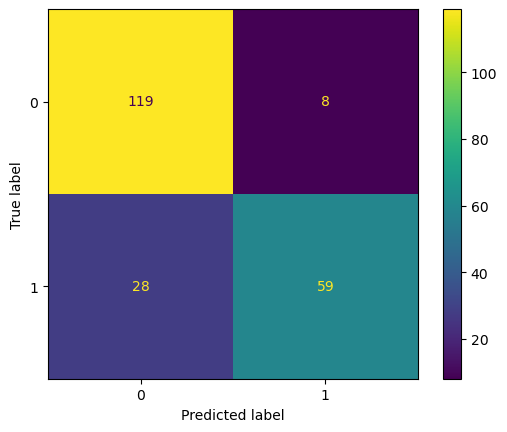

In [27]:
# Visualización de la matriz de confusion de los resultados del modelo entrenado:
cm = confusion_matrix (y_test, prediccion)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot();